In [1]:
import matplotlib.pyplot as pp
import numpy as np
import torch

In [35]:
pp.rc('text', usetex=True)

tensor(9.9948e-05, grad_fn=<MeanBackward0>)
tensor(9.9791e-05, grad_fn=<MeanBackward0>)
tensor(0.0098, grad_fn=<MeanBackward0>)
tensor(0.0211, grad_fn=<MeanBackward0>)
tensor(9.9650e-05, grad_fn=<MeanBackward0>)
tensor(0.0004, grad_fn=<MeanBackward0>)
tensor(9.9621e-05, grad_fn=<MeanBackward0>)
tensor(0.0133, grad_fn=<MeanBackward0>)
tensor(9.9802e-05, grad_fn=<MeanBackward0>)
tensor(9.9813e-05, grad_fn=<MeanBackward0>)


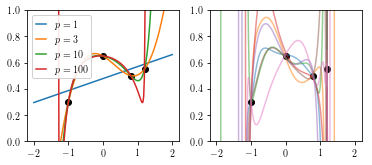

In [128]:
import warnings
f, ax = pp.subplots(1,2,figsize=(6,2.4))
pp.sca(ax[0])
warnings.simplefilter('ignore', np.RankWarning)
x = np.array([-1, 0, 0.8, 1.2])
y = np.array([0.5, 0.85, 0.7, 0.75])-0.2
for deg in [1, 3, 10, 100]:
    p = np.polyfit(x, y, deg)
    xs = np.linspace(-2, 2, 200)
    pp.plot(xs, (xs[:, None] ** (p.shape[0]-1-np.arange(p.shape[0])[None, :]) * p[None, :]).sum(1),
           label=f'$p={deg}$')
pp.ylim(0, 1)
pp.legend(framealpha=0.9, loc='upper left', handlelength=1)
pp.scatter(x, y, c='black')
pp.sca(ax[1])
torch.manual_seed(1234)
for i in range(10):
    d = 100
    w = torch.randn(d, requires_grad=True)
    #w.data.mul_(1e-1)
    opt = torch.optim.Adam([w], 1e-3)
    ux = torch.tensor(x[:, None]).float() ** torch.arange(d)[None, :]
    mu = ux.mean(0, keepdim=True)
    sigma = ux.std(0, keepdim=True)
    ux = (ux - mu) / (sigma + 1e-10)
    ux[:, 0] = 1
    uy = torch.tensor(y).float()
    for t in range(5000):
        loss = (w @ ux.T - uy).pow(2).mean()
        loss.backward()
        opt.step()
        opt.zero_grad()
        if loss < 0.0001:
            break
    print(loss)
    if loss > 0.001:
        continue
    px = torch.tensor(xs[:, None]).float() ** torch.arange(d)[None, :]
    px = (px - mu) / (sigma + 1e-10)
    px[:, 0] = 1
    pp.plot(xs, (w @ px.T).data.numpy(), alpha=0.5)
pp.ylim(0, 1)
pp.scatter(x, y, c='black')
pp.savefig('poly_regression.pdf')

In [111]:
d = 100
w = torch.randn(d, requires_grad=True)
w.data.mul_(1e-3)
opt = torch.optim.Adam([w], 1e-3)
ux = torch.tensor(x[:, None]).float() ** torch.arange(d)[None, :]
ux = (ux - ux.mean(0, keepdim=True)) / (ux.std(0, keepdim=True) + 1e-10)
ux[:, 0] = 1
uy = torch.tensor(y).float()
for t in range(1000):
    loss = (w @ ux.T - uy).pow(2).mean()
    loss.backward()
    opt.step()
    opt.zero_grad()
    if not t % 100:
        print(loss)

tensor(0.2654, grad_fn=<MeanBackward0>)
tensor(0.1631, grad_fn=<MeanBackward0>)
tensor(0.1006, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0325, grad_fn=<MeanBackward0>)
tensor(0.0167, grad_fn=<MeanBackward0>)
tensor(0.0080, grad_fn=<MeanBackward0>)
tensor(0.0035, grad_fn=<MeanBackward0>)
tensor(0.0014, grad_fn=<MeanBackward0>)
tensor(0.0005, grad_fn=<MeanBackward0>)


In [22]:
(xs[:2, None] ** (p.shape[0]-1-np.arange(p.shape[0])[None, :]) * p[None, :],
 (p.shape[0]-1-np.arange(p.shape[0])[None, :]))

(array([[-0.46996364,  1.41195952, -0.26472581,  0.33811848],
        [-0.44205253,  1.3554869 , -0.25937781,  0.33811848]]),
 array([[3, 2, 1, 0]]))

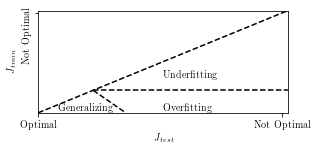

In [47]:
import warnings

pp.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
pp.figure(figsize=(4.5,2.2))
pp.plot([0,1],[0,1],color='black',ls='--')
pp.plot([0.22,0.35],[0.22,0],color='black',ls='--')
pp.plot([0.22,1],[0.22,0.22],color='black',ls='--')
#pp.annotate(s='', xy=(0.4,0.0), xytext=(0.4,0.4), arrowprops=dict(arrowstyle='<->', color='blue'))
pp.text(0.08,0.02,"Generalizing")
pp.text(0.5,0.02,"Overfitting")
pp.text(0.5,0.34,"Underfitting")
#pp.text(0.06,0.57,"Generalization Gap", rotation=-10, color='blue')
pp.xlim(0,1)
pp.ylim(0,1)
pp.ylabel("$J_{train}$")
pp.xlabel("$J_{test}$")
pp.xticks(ticks=[0,1-0.025],labels=["Optimal", "Not Optimal"])
_, tick = pp.yticks(ticks=[1-0.025],labels=["Not Optimal"],)
tick[0].set_rotation(90)
pp.tight_layout()
pp.savefig('overunderfit.pdf')